In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [55]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [17]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [18]:
y.shape

(70000,)

In [7]:
28 * 28

784

In [2]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data  # Features (images)
y = mnist.target  # Labels (digits)

# Display the shape of X to verify
print("Shape of X:", X.shape)  # Should print (70000, 784) for MNIST

# Plotting the first digit
some_digit = X.iloc[0].values  # Get the first digit as a NumPy array
some_digit_image = some_digit.reshape(28, 28)  # Reshape to 28x28 pixels

plt.imshow(some_digit_image, cmap=plt.cm.binary)  # Display the image
plt.axis("off")  # Turn off the axis
plt.savefig("some_digit_plot.png")  # Save the figure
plt.show()  # Show the plot


C:\Users\HP\anaconda3\envs\poojithaenvironment\lib\site-packages\sklearn\datasets\_openml.py:65: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


ImportError: fetch_openml with as_frame=True requires pandas.

In [48]:
y[0]

'5'

In [ ]:
y = y.astype(np.uint8)

In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [ ]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [15]:
import matplotlib.pyplot as plt

# Create a figure with specified size
plt.figure(figsize=(9, 9))  # This line should not have extra indentation

# Select the first 100 images
Select the first 100 images
----> 7 example_images = X[:100]    # Ensure this line is also not indented
      8 
      9 # Call the function to plot the digits

plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")  # This line should also not be indented
plt.show()



SyntaxError: invalid syntax (<ipython-input-15-e896ee9ffc43>, line 7)

In [19]:
y[0]

NameError: name 'y' is not defined

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

X, y = mnist["data"], mnist["target"]
y = y.astype(int)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# SVM with Linear Kernel
linear_svm = SVC(kernel='linear')

# Training
linear_svm.fit(X_train, y_train)

# Prediction and Evaluation
y_pred = linear_svm.predict(X_test)
linear_accuracy = accuracy_score(y_test, y_pred)
linear_report = classification_report(y_test, y_pred)

print(f"Linear SVM Accuracy: {linear_accuracy}")
print(f"Classification Report: \n{linear_report}")

In [ ]:
# Polynomial SVM - Hyperparameter Tuning
param_grid_poly = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'coef0': [0, 1, 10]
}

poly_svm = SVC(kernel='poly')
grid_poly = GridSearchCV(poly_svm, param_grid_poly, cv=3, n_jobs=-1, verbose=2)

# Training with GridSearch
grid_poly.fit(X_train, y_train)

# Best Parameters
print(f"Best parameters for Polynomial SVM: {grid_poly.best_params_}")

# Prediction and Evaluation
y_pred_poly = grid_poly.predict(X_test)
poly_accuracy = accuracy_score(y_test, y_pred_poly)
poly_report = classification_report(y_test, y_pred_poly)

print(f"Polynomial SVM Accuracy: {poly_accuracy}")
print(f"Classification Report: \n{poly_report}")

In [ ]:
# RBF SVM - Hyperparameter Tuning
param_grid_rbf = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

rbf_svm = SVC(kernel='rbf')
grid_rbf = GridSearchCV(rbf_svm, param_grid_rbf, cv=3, n_jobs=-1, verbose=2)

# Training with GridSearch
grid_rbf.fit(X_train, y_train)

# Best Parameters
print(f"Best parameters for RBF SVM: {grid_rbf.best_params_}")

# Prediction and Evaluation
y_pred_rbf = grid_rbf.predict(X_test)
rbf_accuracy = accuracy_score(y_test, y_pred_rbf)
rbf_report = classification_report(y_test, y_pred_rbf)

print(f"RBF SVM Accuracy: {rbf_accuracy}")
print(f"Classification Report: \n{rbf_report}")

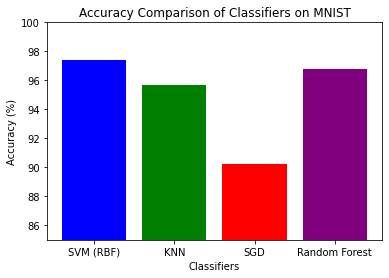

In [16]:
import matplotlib.pyplot as plt

# Classifier names
classifiers = ['SVM (RBF)', 'KNN', 'SGD', 'Random Forest']

# Accuracy scores
accuracy_scores = [97.4, 95.7, 90.2, 96.8]

# Create bar chart for accuracy comparison
plt.bar(classifiers, accuracy_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Classifiers on MNIST')
plt.ylim(85, 100)
plt.show()

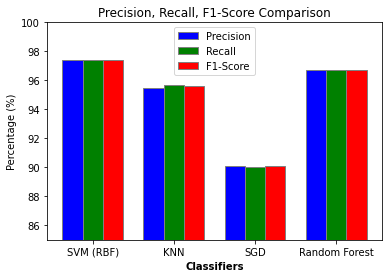

In [17]:
import numpy as np

# Precision, Recall, F1-score for each classifier
precision_scores = [97.4, 95.5, 90.1, 96.7]
recall_scores = [97.4, 95.7, 90.0, 96.7]
f1_scores = [97.4, 95.6, 90.1, 96.7]

# Plot the metrics as a grouped bar chart
barWidth = 0.25
r1 = np.arange(len(classifiers))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, precision_scores, color='blue', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r2, recall_scores, color='green', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r3, f1_scores, color='red', width=barWidth, edgecolor='grey', label='F1-Score')

plt.xlabel('Classifiers', fontweight='bold')
plt.ylabel('Percentage (%)')
plt.xticks([r + barWidth for r in range(len(classifiers))], classifiers)
plt.title('Precision, Recall, F1-Score Comparison')
plt.legend()
plt.ylim(85, 100)
plt.show()

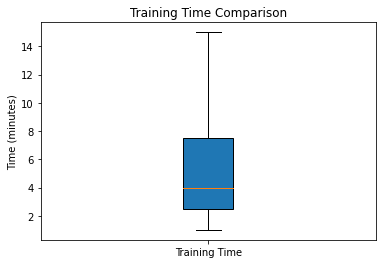

In [18]:
# Training times (in minutes)
training_times = [5, 15, 1, 3]

# Create box plot for training time comparison
plt.boxplot(training_times, patch_artist=True)
plt.xticks([1], ['Training Time'])
plt.ylabel('Time (minutes)')
plt.title('Training Time Comparison')
plt.show()